# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Оглавление:
* [Изучение данных](#1)
* [Предобработка данных](#2)
* [Исследовательский анализ](#3)
* [Общий итог](#4)

## Изучение данных<a class="anchor" id="1"></a>
### Открою файл с данными и изучу общую информацию.

In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\JesusChristosovitch\Desktop\Project\Project1\file_name.csv')

display(df.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
def func(a):
    df[a].hist(color='red', bins=40, range=(0,200), figsize=(16,8))
    plt.show()
    res = df[a].value_counts()
    result = df[a].describe()
    return res, result

In [5]:
def func1(b):
    df[b].hist(color='red', bins=40, figsize=(16,8))
    plt.show()
    res = df[b].value_counts()
    result = df[b].describe()
    return res, result

**Построю общие графики по каждому столбцу для первичного знакомства с данными.**

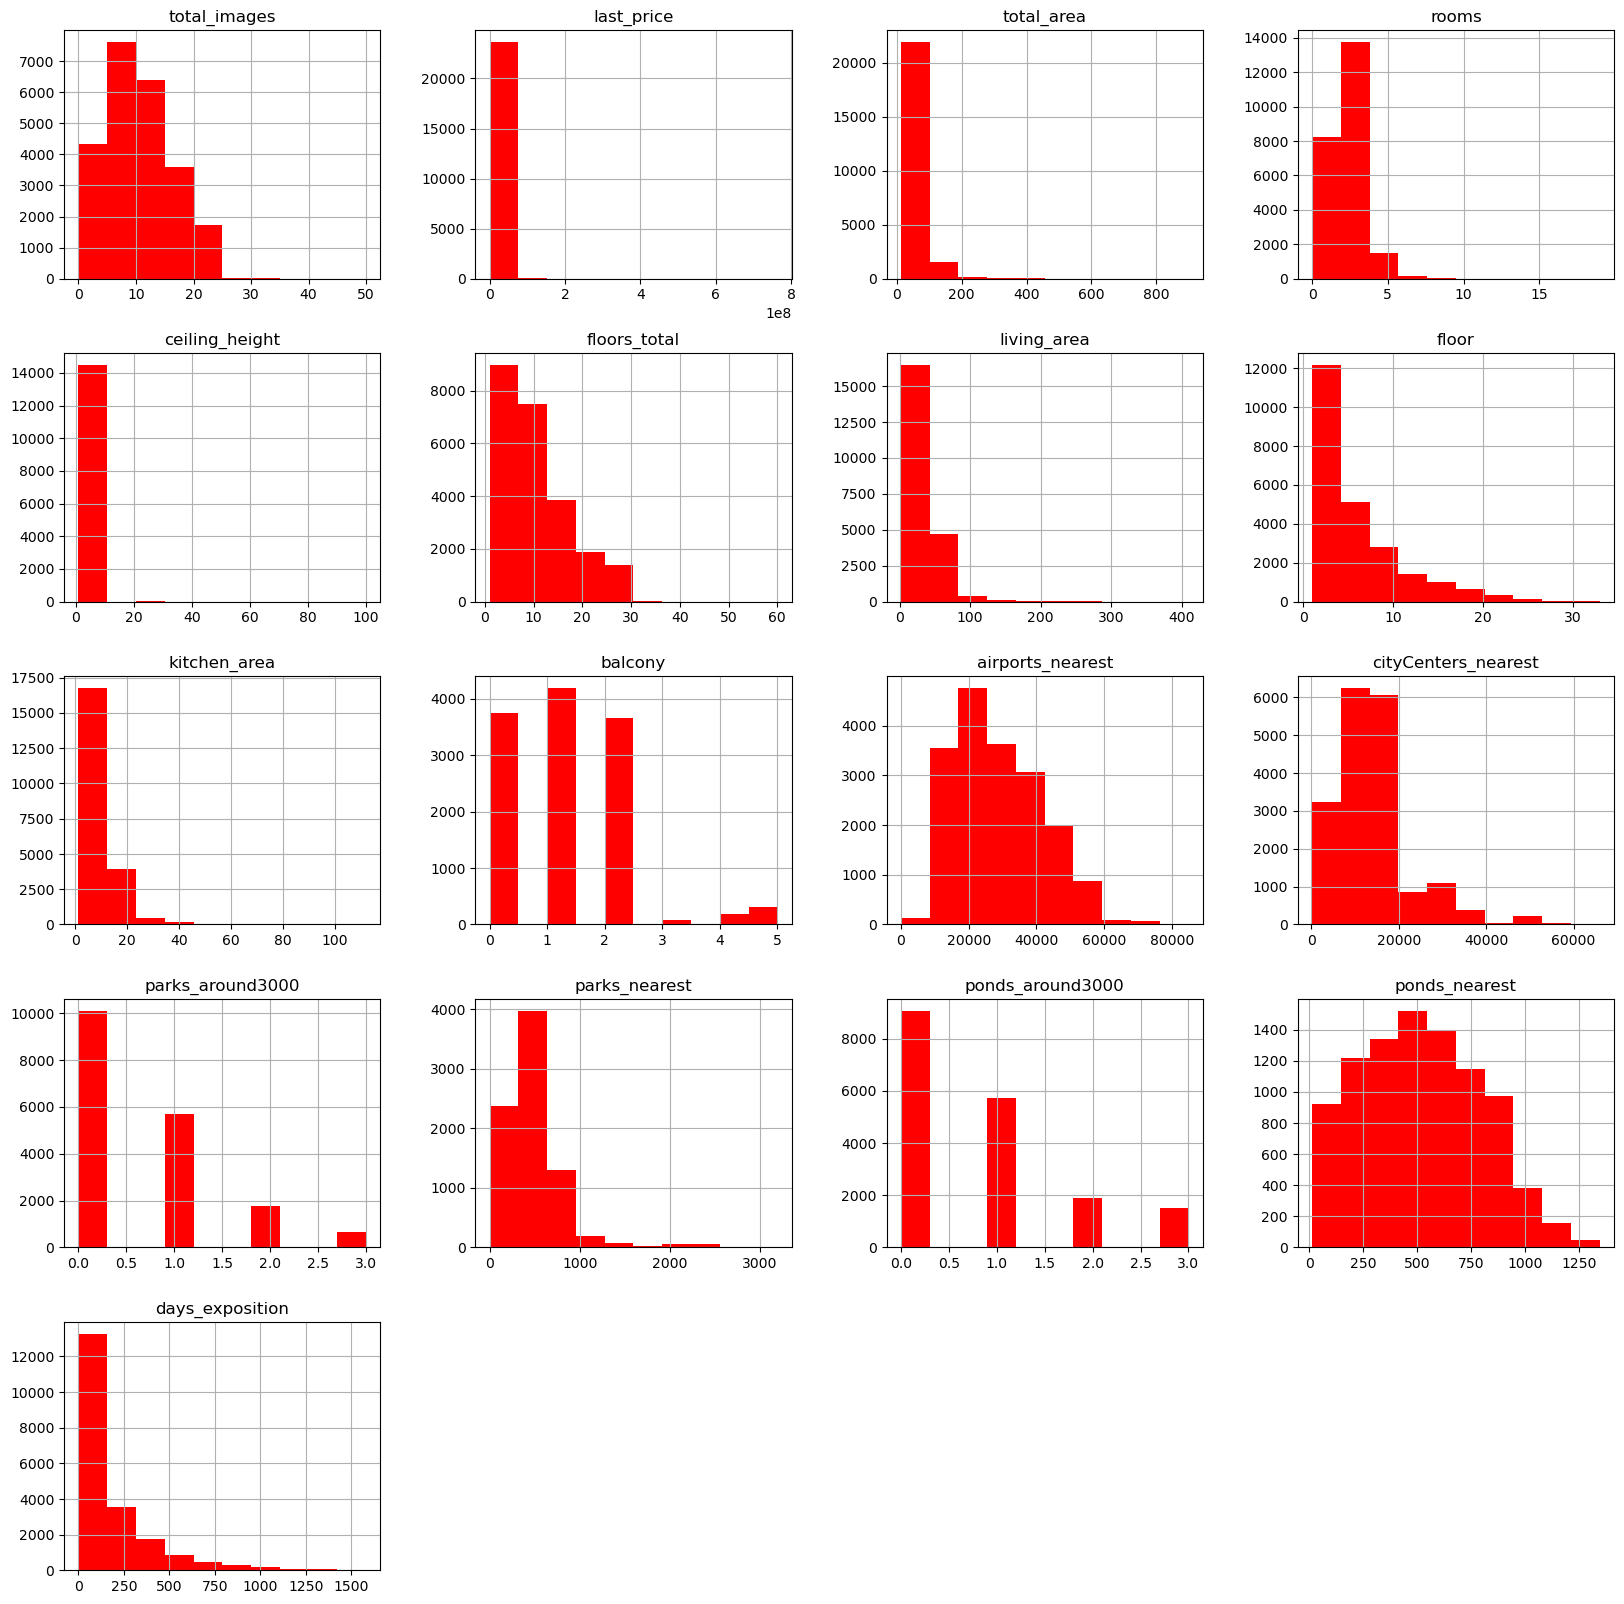

In [6]:
df.hist(color='red', figsize=(20,20), grid=True)
plt.show()

**По графикам выше я могу сделать следующие выводы:**

- в среднем в объявлениях находится около `6-10 изображений`; 
- `цена` доходит до `100 000 000`; 
- 90% квартир имеют `общую площадь` до `100 квадратных метров`; 
- большинство квартир имеют `2-4 комнаты`; 
- `высота потолков` достигает `10 метров`; 
- около 2/3 находятся в зданиях, `максимальный этаж которых не превышает 12`; 
- 70% квартир имеют `жилую площадь до 50 кв.м.`; 
- `средний этаж` продающихся квартир - `от 1 до 4`; 
- `площадь кухни` в большинстве квартир `не превышает 15 кв.м.`; 
- в большинстве квартир `1 балкон`; 
- большая часть квартир находятся в радиусе `20 км от аэропорта`; 
- большая часть квартир находятся в радиусе `10-20 км от центра города`; 
- около 10 тысяч квартир `не имеет парков в радиусе 3 км`; 
- большая часть квартир находятся в радиусе `0.5 км от парков`; 
- около 9 тысяч квартир `не имеют водоёмов в радиусе 3 км`; 
- большая часть квартир `имеет водоём в радиусе 0.5 км`; 
- 70% квартир были `проданы менее чем за полгода`.

## Предобработка данных <a class="anchor" id="2"></a>

### На этом этапе я заполню пропущенные значения, изменю типы данных, устраню неявные дубликаты, а также добавлю новые столбцы.

**Перед подсчетом пропусков и заменой данных изменю тип данных в столбце `first_day_exposition` на `datetime`.**

In [7]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], errors='coerse')

**Выведу количество пропущенных значений для каждого столбца.**

In [8]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


**Наблюдаем следующую картину: столбцы `ceiling_heigh`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`,`ponds_nearest` и `days_exposition` имеют пропуски в данных.**

**Пропуски в столбце `locality_name` заменю на пустую строку.**

In [9]:
df['locality_name'] = df['locality_name'].fillna('')

**Если в пункте про апартаменты ничего не указали, вероятно речь идет о жилом помещении. Заполню пропуски значением `False`.**

In [10]:
df['is_apartment'] = df['is_apartment'].fillna(False)

**Посмотрим на уникальные значения высоты потолков из столбца `ceiling_height`.**

In [11]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [12]:
print(df.loc[(df['ceiling_height'] > 20.0), 'ceiling_height'].unique())

[ 25.   32.   27.   24.   26.   22.6  27.5 100. ]


**В столбце `ceiling_height` мы наблюдаем выброс - значения, разительно превышающие 20 метров. Скорее всего это опечатка, проблема в дробной части. Поделю эти значения на 10.**

In [13]:
df.loc[(df['ceiling_height'] > 20.0), 'ceiling_height'] = df.loc[(df['ceiling_height'] > 20.0), 'ceiling_height'] / 10

**Отсутствующие значения заменю на медианные значения в соответствующих локациях.**

In [14]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('locality_name')['ceiling_height'].transform('median'))

**В столбцах `ponds_around3000` и `parks_around3000` отсутствие значений может обозначать отсутствие водоёмов и парков в радиусе 3000 метров.**

**В `balcony` значение `nan` может обозначать отсутствие балконов. Заменю значения на `0`.**

In [15]:
df['balcony'] = df['balcony'].fillna('0').astype('float')

**Избавлюсь от неявных дубликатов.**

In [16]:
df['locality_name'] = df['locality_name'].str.replace('посёлок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('городской посёлок', 'поселок городского типа')

**Самое высокое жилое здание Санкт-Петербурга - ЖК «Князь Александр Невский» - имеет 37 этажей. Все значения выше 37 можно убрать.**

In [17]:
df.loc[df['floors_total']>37, 'floors_total'].unique()

array([60., 52.])

In [18]:
df['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

In [19]:
df = df.query('floors_total<=37')

**Квартиры с количеством комнат более 10 - скорее исключение, нежели правило. Избавимся от таких строк.**

In [20]:
df = df.query('rooms <= 10')

**Таким образом я уменьшил количество пропусков в табличных данных.**

### Посчитаю и добавлю в таблицу новые столбцы.

In [21]:
df['mean_square_price'] = df['last_price']/df['total_area']

df['mean_square_price'].sort_values().unique()

array([1.11834862e+02, 7.96296296e+03, 9.61538462e+03, ...,
       1.54260480e+06, 1.73684211e+06, 1.90750000e+06])

In [22]:
df['mean_square_price'].unique()

array([120370.37037037,  82920.79207921,  92785.71428571, ...,
        44091.71075838, 149511.40065147,  41795.66563467])

**Добавлю в таблицу столбцы с днём, месяцем и годом публикации объявления.**

In [23]:
# df['day_publication1'] = df['first_day_exposition'].dt.weekday - альтернатива
df['day_publication'] = pd.DatetimeIndex(df['first_day_exposition']).weekday 
df['month_publication'] = pd.DatetimeIndex(df['first_day_exposition']).month 
df['year_publication'] = pd.DatetimeIndex(df['first_day_exposition']).year 

**Занесу в таблицу удалённость квартиры от центра в километрах.**

In [24]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round()

**Занесу в таблицу тип этажа.**

In [25]:
def floor_category(row):
    fl = row['floor']
    fl_total = row['floors_total']
    if fl == 1:
        return 'первый'
    if fl == fl_total:
        return 'последний'
    return 'другой'
df['floor_category'] = df.apply(floor_category, axis=1)
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,mean_square_price,day_publication,month_publication,year_publication,cityCenters_nearest_km,floor_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,16.0,другой
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,19.0,первый
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,14.0,другой
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,7.0,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,8.0,другой
5,10,2890000.0,30.40,2018-09-10,1,2.60,12.0,14.40,5,False,...,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,NaN,другой
6,6,3700000.0,37.30,2017-11-02,1,2.64,26.0,10.60,6,False,...,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,19.0,другой
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,NaN,22,False,...,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,12.0,другой
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,False,...,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,NaN,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,15.0,другой


## Исследовательский анализ  <a class="anchor" id="3"></a>
### Проведу исследовательский анализ данных.

**ОБЩАЯ ПЛОЩАДЬ**

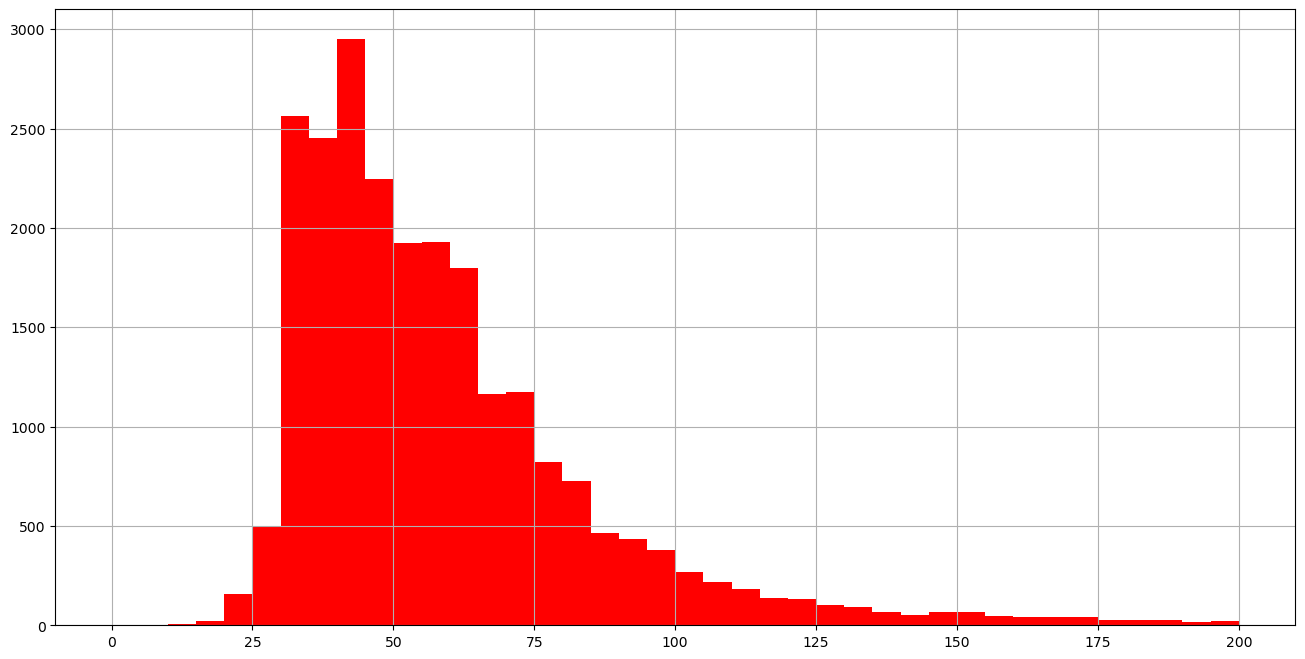

(45.00     419
 42.00     383
 60.00     347
 31.00     346
 44.00     345
          ... 
 130.21      1
 58.71       1
 60.75       1
 63.19       1
 76.75       1
 Name: total_area, Length: 2153, dtype: int64,
 count    23603.000000
 mean        60.230400
 std         34.882807
 min         12.000000
 25%         40.000000
 50%         52.000000
 75%         69.705000
 max        631.200000
 Name: total_area, dtype: float64)

In [26]:
func('total_area')

**По графику видно, что пик приходится на диапазон от 40 до 45. Таких квартир 2,9 тысяч. Медиана равна 52.**

**ЖИЛАЯ ПЛОЩАДЬ**

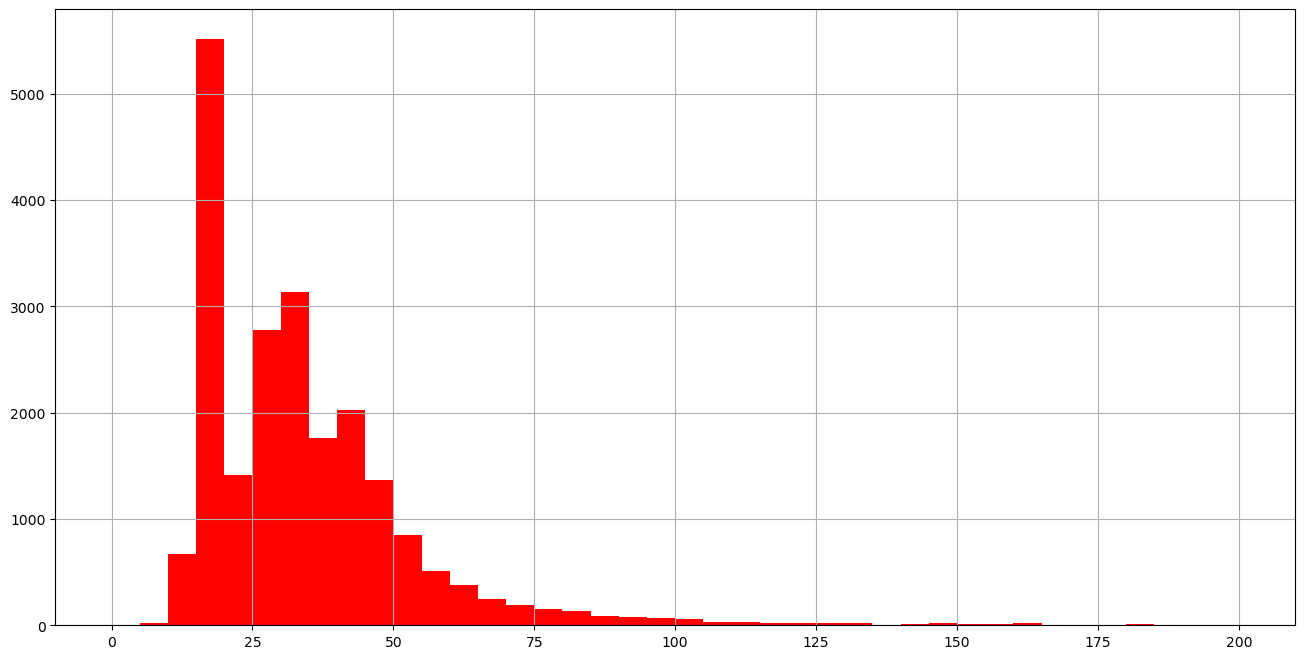

(18.00    882
 17.00    674
 30.00    598
 16.00    484
 20.00    481
         ... 
 91.24      1
 77.80      1
 92.10      1
 94.54      1
 42.55      1
 Name: living_area, Length: 1762, dtype: int64,
 count    21733.000000
 mean        34.388490
 std         21.590259
 min          2.000000
 25%         18.600000
 50%         30.000000
 75%         42.300000
 max        347.500000
 Name: living_area, dtype: float64)

In [27]:
func('living_area')

**По графику видно, что пик приходится на диапазон от 15 до 20. Таких квартир 5.6 тысяч. Медиана равна 29.**

**ПЛОЩАДЬ КУХНИ**

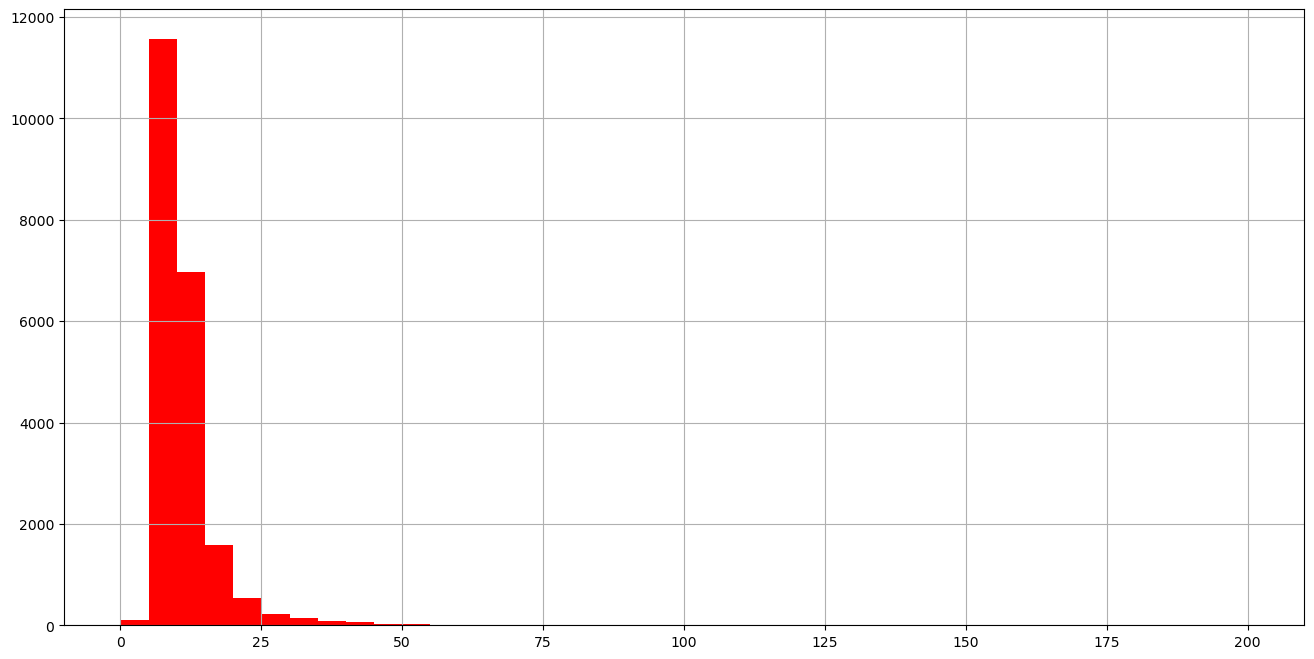

(6.00     1300
 10.00    1262
 8.00     1110
 9.00     1100
 7.00     1062
          ... 
 20.56       1
 53.10       1
 12.56       1
 11.84       1
 13.83       1
 Name: kitchen_area, Length: 963, dtype: int64,
 count    21372.000000
 mean        10.553083
 std          5.830384
 min          1.300000
 25%          7.000000
 50%          9.100000
 75%         12.000000
 max        107.000000
 Name: kitchen_area, dtype: float64)

In [28]:
func('kitchen_area')

**По графику видно, что пик приходится на диапазон от 5 до 10. Таких квартир 11.5 тысяч. Медиана равна 9.**

**ЦЕНА ОБЪЕКТА**

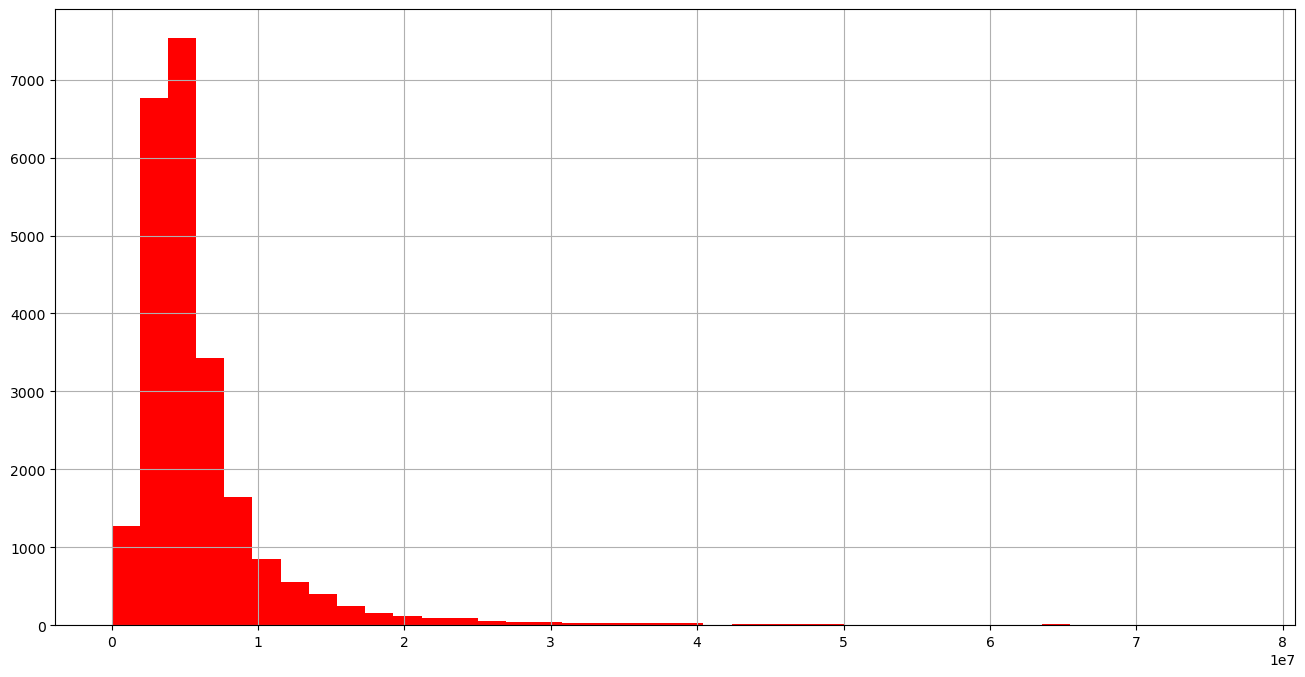

count    2.360300e+04
mean     6.515462e+06
std      1.055417e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [29]:
df['last_price'].hist(color='red', bins=40, range=(0,77000000), figsize=(16,8))
plt.show()
df['last_price'].describe()

**Около 7500 тысяч квартир продавались примерно за 5 000 000. Медиана равна 4 650 000.**

**КОЛИЧЕСТВО КОМНАТ**

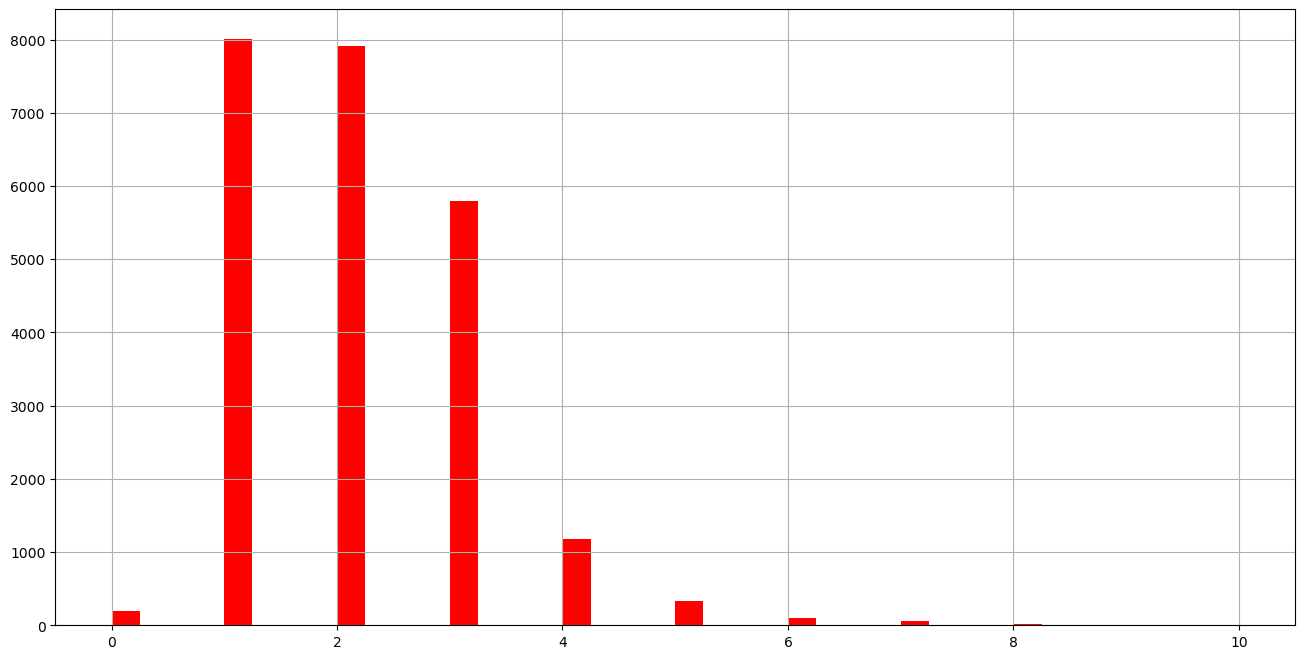

(1     8014
 2     7912
 3     5795
 4     1177
 5      325
 0      194
 6      104
 7       59
 8       12
 9        8
 10       3
 Name: rooms, dtype: int64,
 count    23603.000000
 mean         2.067152
 std          1.054939
 min          0.000000
 25%          1.000000
 50%          2.000000
 75%          3.000000
 max         10.000000
 Name: rooms, dtype: float64)

In [30]:
func1('rooms')

**Больше всего квартир с 1 и 2 комнатами - их количество в сумме равно примерно 16 000.**

**ВЫСОТА ПОТОЛКОВ**

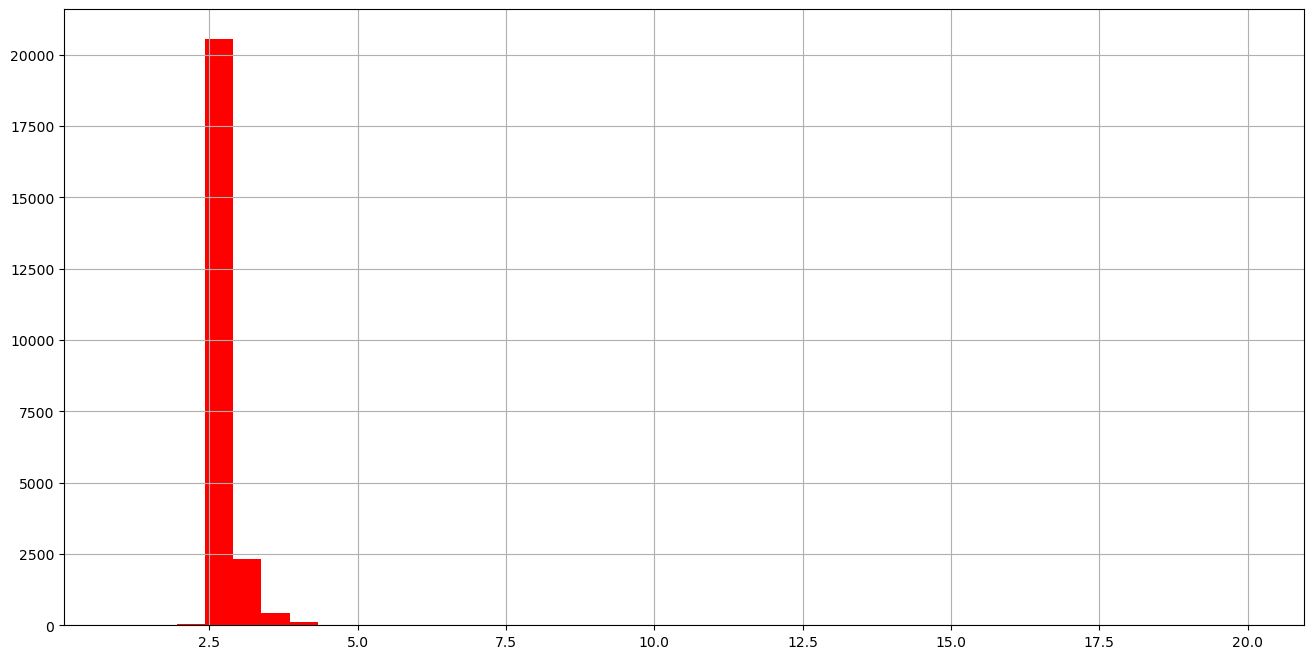

(2.70    7759
 2.50    4167
 2.60    2138
 2.55    1571
 2.75    1122
         ... 
 3.98       1
 2.20       1
 4.06       1
 1.20       1
 3.59       1
 Name: ceiling_height, Length: 188, dtype: int64,
 count    23483.000000
 mean         2.706711
 std          0.281752
 min          1.000000
 25%          2.550000
 50%          2.700000
 75%          2.700000
 max         20.000000
 Name: ceiling_height, dtype: float64)

In [31]:
func1('ceiling_height')

**По графику видно, что пик значений приходится на 3. Квартир с потолками 2.5 м свыше 20 тысяч. Медиана равна 2.7.**

**ЭТАЖ КВАРТИРЫ**

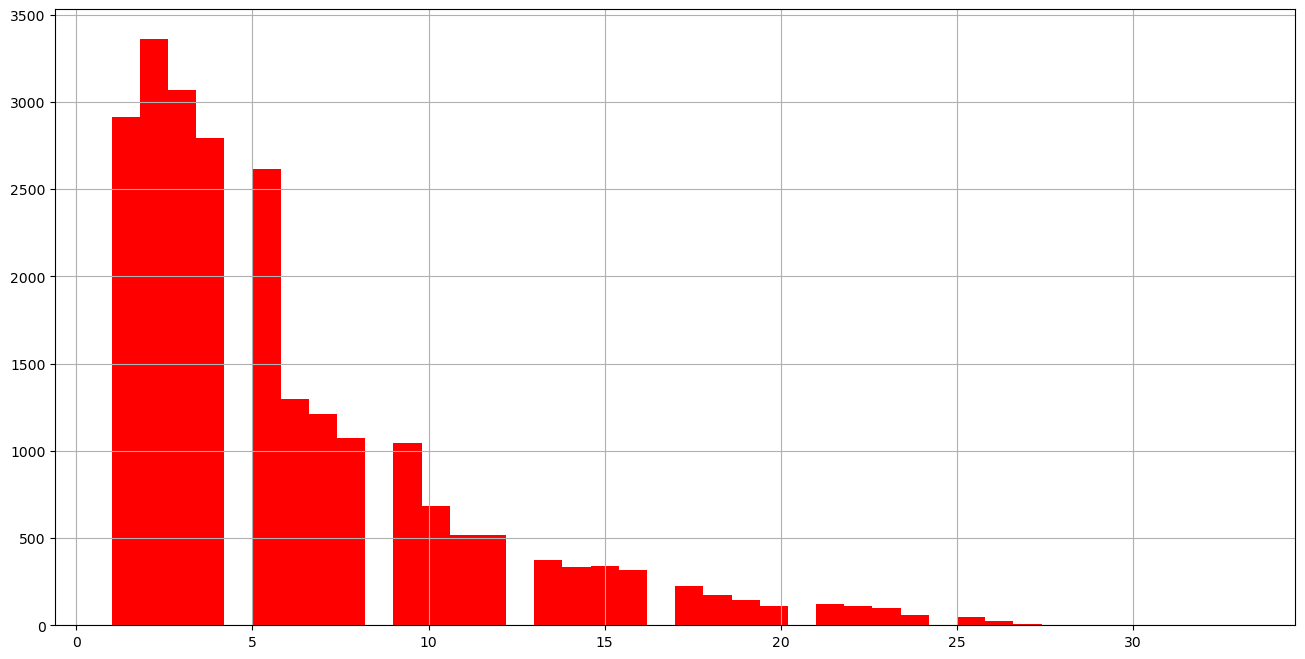

(2     3363
 3     3068
 1     2914
 4     2791
 5     2617
 6     1296
 7     1213
 8     1075
 9     1046
 10     684
 12     520
 11     520
 13     376
 15     340
 14     335
 16     315
 17     226
 18     174
 19     144
 21     121
 22     112
 20     108
 23      99
 24      61
 25      45
 26      24
 27      10
 28       1
 30       1
 29       1
 32       1
 33       1
 31       1
 Name: floor, dtype: int64,
 count    23603.000000
 mean         5.876795
 std          4.872059
 min          1.000000
 25%          2.000000
 50%          4.000000
 75%          8.000000
 max         33.000000
 Name: floor, dtype: float64)

In [32]:
func1('floor')

**По графику видно, что пик значений приходится на 2. Квартир, расположенных на втором этаже, 3368. Медиана равна 4.**

**ТИП ЭТАЖА КВАРТИРЫ**

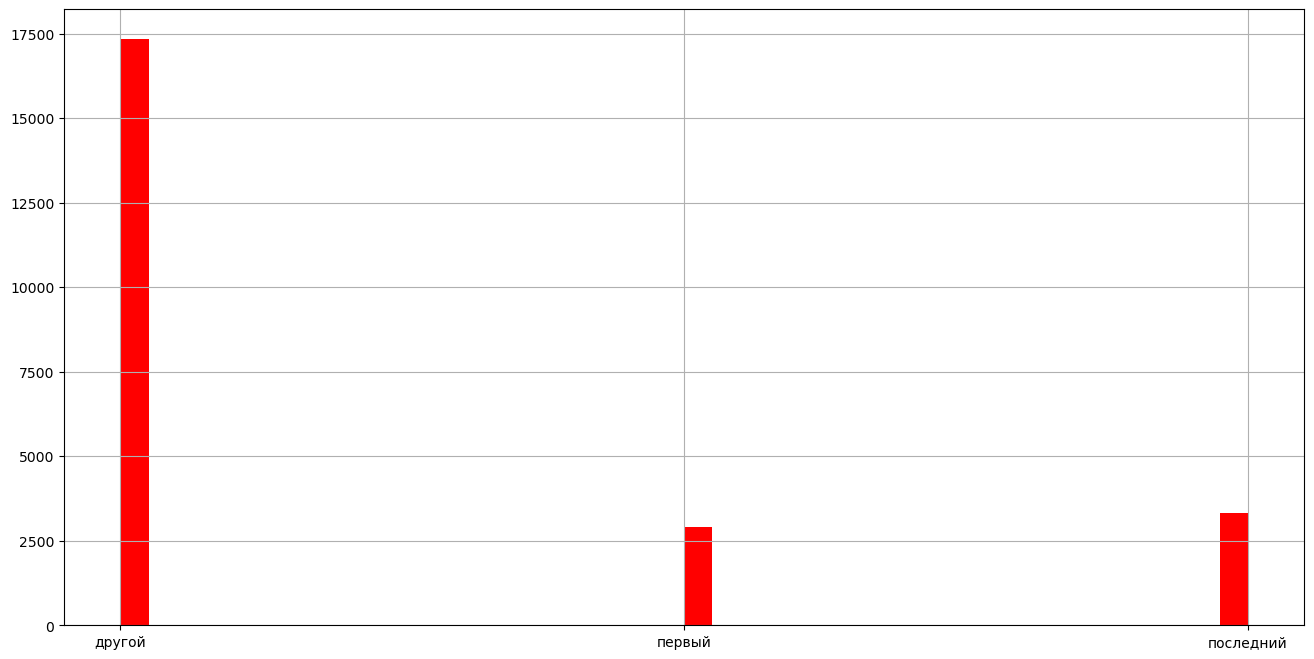

(другой       17356
 последний     3333
 первый        2914
 Name: floor_category, dtype: int64,
 count      23603
 unique         3
 top       другой
 freq       17356
 Name: floor_category, dtype: object)

In [33]:
func1('floor_category')

**Большинство квартир относятся к категории "Другой". Таких квартир 17446.**

**ОБЩЕЕ КОЛИЧЕСТВО ЭТАЖЕЙ В ДОМЕ**

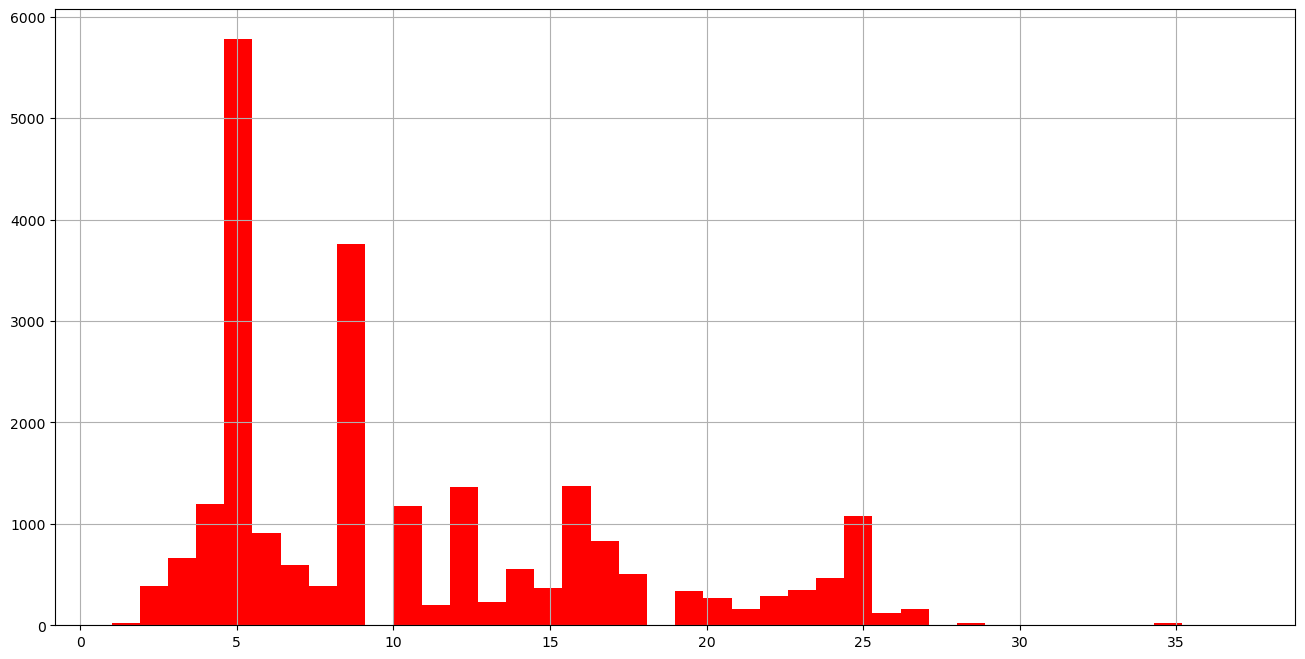

(5.0     5785
 9.0     3761
 16.0    1376
 12.0    1362
 4.0     1198
 10.0    1174
 25.0    1074
 6.0      913
 17.0     833
 3.0      668
 7.0      591
 14.0     553
 18.0     505
 24.0     469
 8.0      390
 2.0      383
 15.0     365
 23.0     352
 19.0     339
 22.0     286
 20.0     271
 13.0     229
 11.0     203
 27.0     164
 21.0     158
 26.0     124
 1.0       25
 35.0      24
 28.0      21
 36.0       3
 34.0       1
 29.0       1
 33.0       1
 37.0       1
 Name: floors_total, dtype: int64,
 count    23603.000000
 mean        10.671016
 std          6.583891
 min          1.000000
 25%          5.000000
 50%          9.000000
 75%         16.000000
 max         37.000000
 Name: floors_total, dtype: float64)

In [34]:
func1('floors_total')

**По графику видно, что пик значений приходится на на диапазон 3-5. Таких квартир около 7 тысяч. Медиана равна 9. Присутствуют выбросы табличных данных в виде значений, превосходящие 30. Вполне возможно, что это единичные случаи высоток.**

**РАССТОЯНИЕ ДО ЦЕНТРА ГОРОДА В МЕТРАХ**

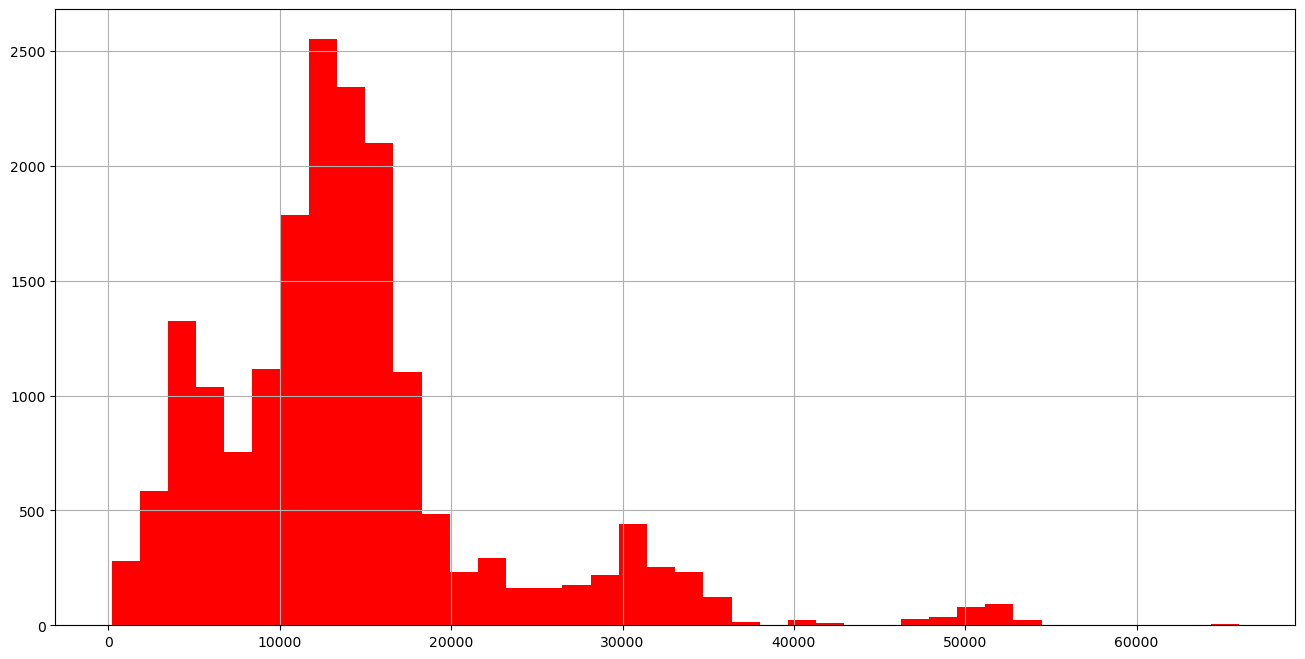

(8460.0     61
 20802.0    32
 10720.0    30
 8434.0     27
 20444.0    27
            ..
 2739.0      1
 17862.0     1
 16631.0     1
 11940.0     1
 6263.0      1
 Name: cityCenters_nearest, Length: 7632, dtype: int64,
 count    18094.000000
 mean     14187.568752
 std       8609.861242
 min        181.000000
 25%       9234.000000
 50%      13094.000000
 75%      16293.000000
 max      65968.000000
 Name: cityCenters_nearest, dtype: float64)

In [35]:
func1('cityCenters_nearest')

**По графику видно, что пик значений приходится на диапазон от 12 до 13 тысяч метров. Таких квартир около 2.5 тысяч. Медиана равна 13098.**

**РАССТОЯНИЕ ДО БЛИЖАЙШЕГО АЭРОПОРТА**

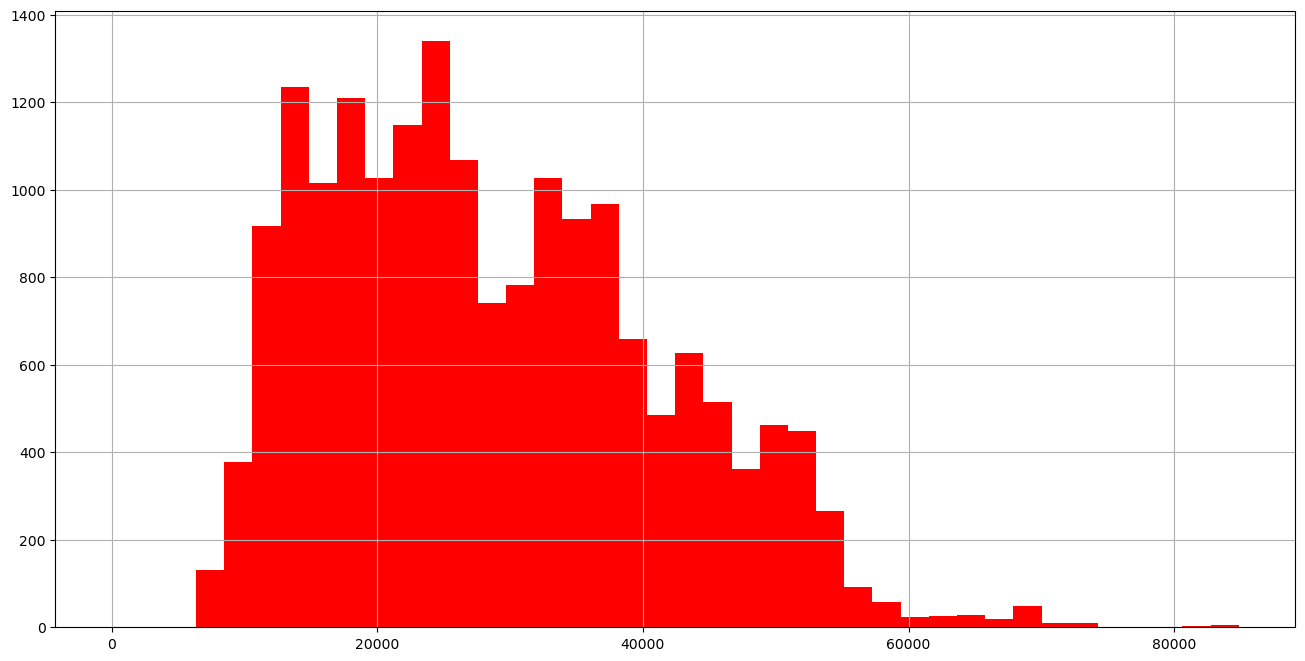

(37434.0    61
 21928.0    32
 44870.0    30
 39946.0    30
 18732.0    27
            ..
 32366.0     1
 13024.0     1
 52394.0     1
 20007.0     1
 24665.0     1
 Name: airports_nearest, Length: 8262, dtype: int64,
 count    18071.000000
 mean     28787.837142
 std      12625.439503
 min          0.000000
 25%      18573.500000
 50%      26729.000000
 75%      37243.000000
 max      84869.000000
 Name: airports_nearest, dtype: float64)

In [36]:
func1('airports_nearest')

**По графику видно, что пик значений приходится на диапазон от 24 до 26 тысяч метров. Таких квартир около 1.3 тысяч. Медиана равна 26726.**

**РАССТОЯНИЕ ДО БЛИЖАЙШЕГО ПАРКА**

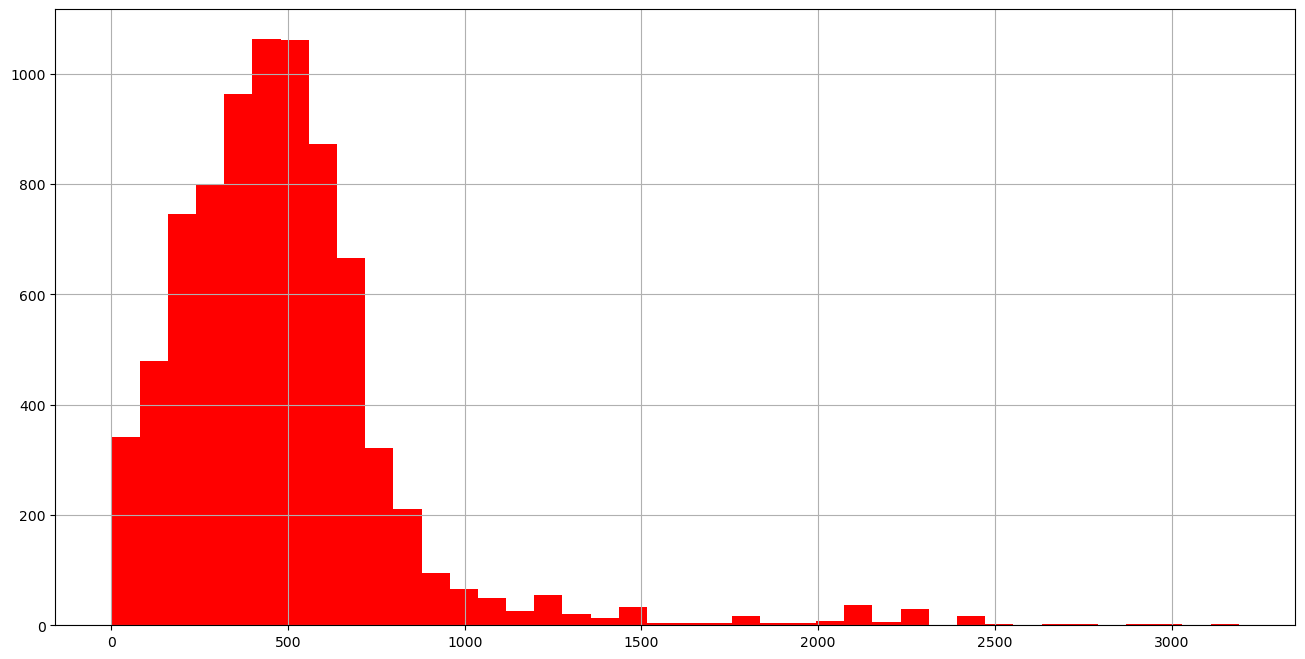

(441.0     67
 173.0     41
 392.0     41
 456.0     40
 471.0     31
           ..
 2747.0     1
 2847.0     1
 1443.0     1
 7.0        1
 2984.0     1
 Name: parks_nearest, Length: 993, dtype: int64,
 count    8039.000000
 mean      490.467347
 std       341.421910
 min         1.000000
 25%       288.000000
 50%       455.000000
 75%       612.000000
 max      3190.000000
 Name: parks_nearest, dtype: float64)

In [37]:
func1('parks_nearest')

**Большая часть квартир (более 2000 единиц) находится на расстоянии 400-600 метров от парков.**

**ДЕНЬ И МЕСЯЦ ПУБЛИКАЦИИ ОБЪЯВЛЕНИЯ**

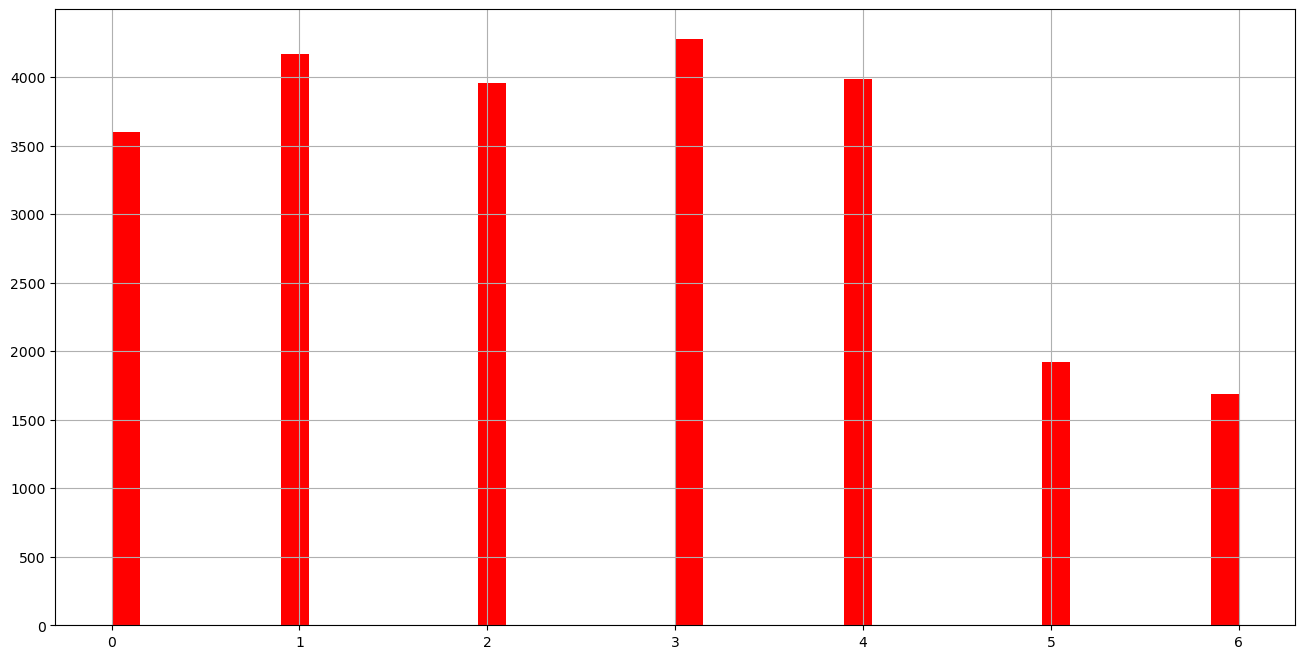

(3    4282
 1    4169
 4    3988
 2    3955
 0    3600
 5    1920
 6    1689
 Name: day_publication, dtype: int64,
 count    23603.000000
 mean         2.567936
 std          1.788468
 min          0.000000
 25%          1.000000
 50%          3.000000
 75%          4.000000
 max          6.000000
 Name: day_publication, dtype: float64)

In [38]:
func1('day_publication')

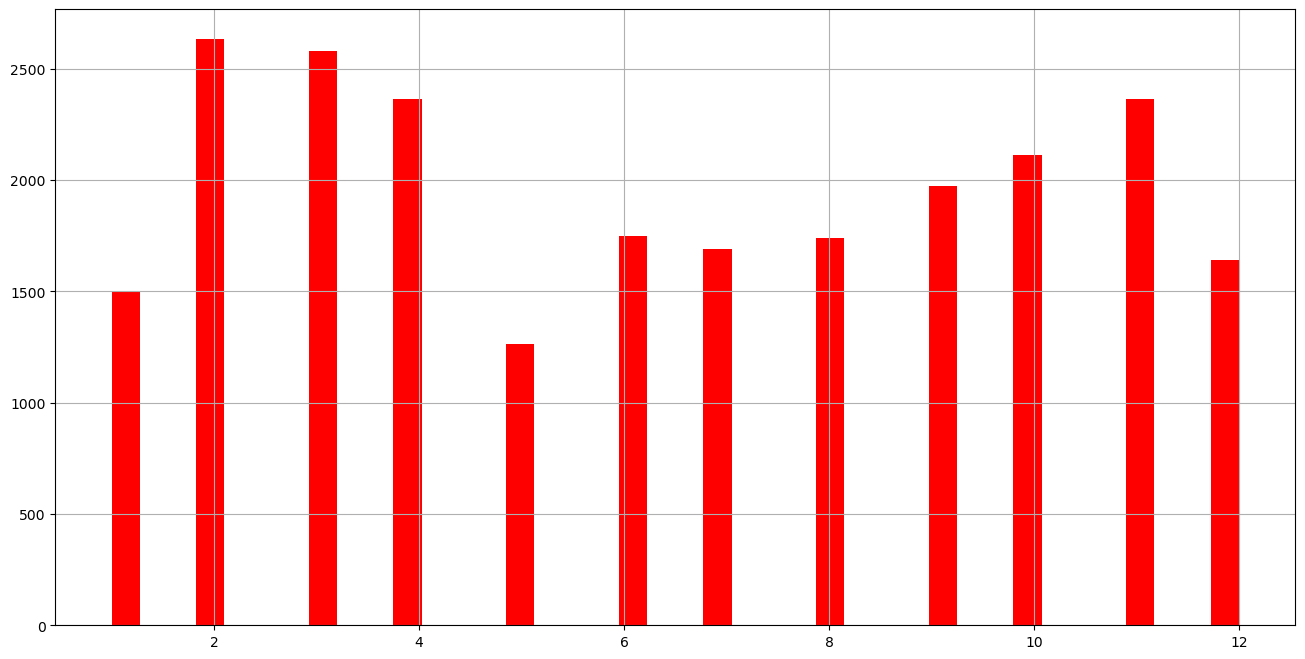

(2     2635
 3     2578
 11    2364
 4     2362
 10    2111
 9     1973
 6     1750
 8     1741
 7     1689
 12    1639
 1     1496
 5     1265
 Name: month_publication, dtype: int64,
 count    23603.000000
 mean         6.400161
 std          3.493099
 min          1.000000
 25%          3.000000
 50%          6.000000
 75%         10.000000
 max         12.000000
 Name: month_publication, dtype: float64)

In [39]:
func1('month_publication')

**Чаще всего объявления о продаже квартир выставлялись в четверг (4295 раз), реже всего в воскресенье (1699 раз). Самая высокая активность была зафиксирована в феврале - в этом месяце было выставлено на продажу 2640 квартир. Напротив, самым скудным на новые объявления оказался май - всего 1274 квартиры.**

**КАК БЫСТРО ПРОДАВАЛИСЬ КВАРТИРЫ**

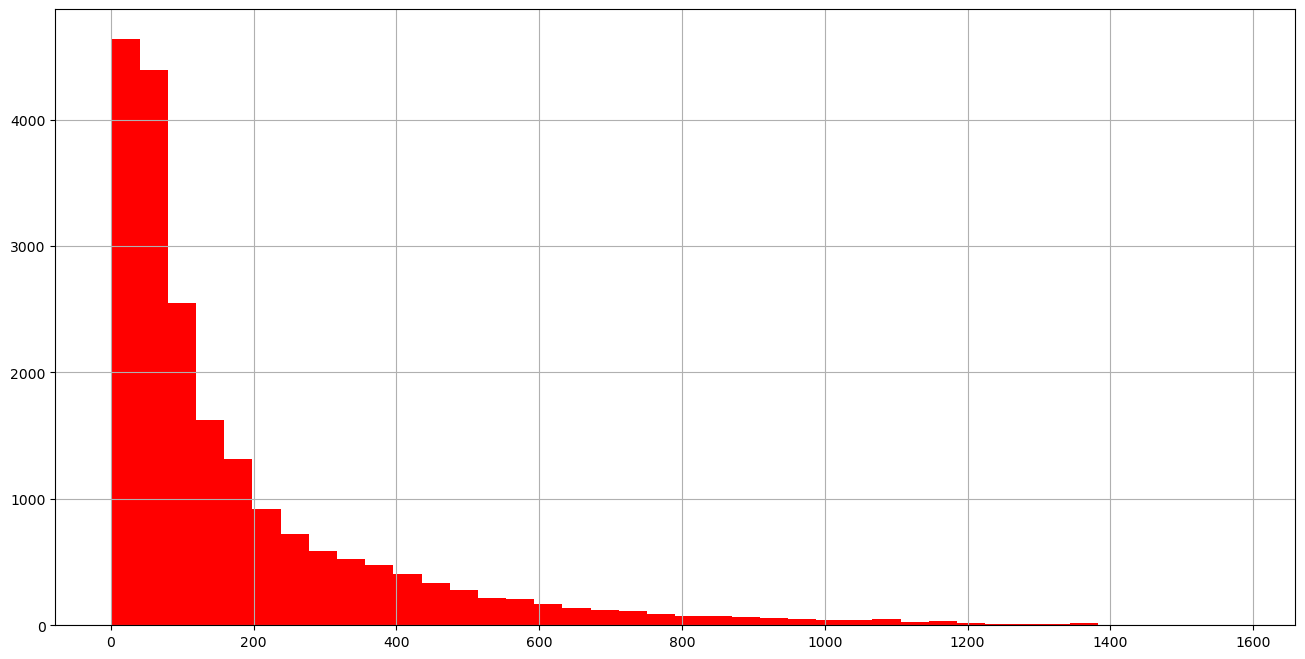

(45.0      879
 60.0      538
 7.0       234
 30.0      208
 90.0      201
          ... 
 1417.0      1
 1116.0      1
 1325.0      1
 1345.0      1
 971.0       1
 Name: days_exposition, Length: 1138, dtype: int64,
 count    20432.000000
 mean       180.811032
 std        219.519756
 min          1.000000
 25%         45.000000
 50%         95.000000
 75%        232.000000
 max       1580.000000
 Name: days_exposition, dtype: float64)

In [40]:
func1('days_exposition')

**Среднее равно 181, медиана равна 95.**

**Чаще всего объявления о продаже закрываются спустя 45 дней - за полтора месяца было продано 880 квартир. Большая часть квартир продана менее чем за шесть месяцев - таких практически 70%. Квартиры, проданные менее чем за месяц, можно считать  проданными за короткий срок. Объявления, висящие более полугода, можно считать долгими.**


**ЗАВИСИМОСТЬ ЦЕНЫ ОТ ПАРАМЕТРОВ**

**1. Общая площадь**

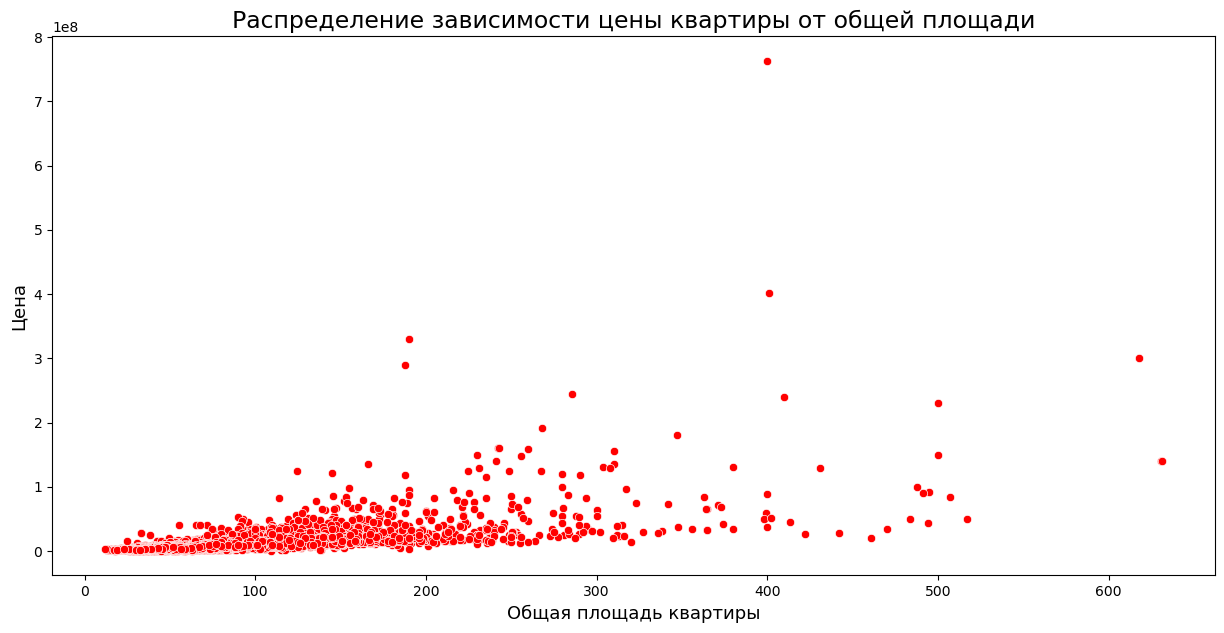

count    2.360300e+04
mean     6.515462e+06
std      1.055417e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [41]:
plt.figure(figsize=(15, 7))
seaborn.scatterplot(data=df, x='total_area', y='last_price', color='red')

plt.title('Распределение зависимости цены квартиры от общей площади', size=17)
plt.xlabel('Общая площадь квартиры', size=13)
plt.ylabel('Цена', size=13)

plt.show()

df['last_price'].describe()

**Наблюдаем большое скопление точек вокруг точки с координатами [0.7, 200]. Это значит, что большая часть квартир, общая площадь которых достигает 200 квадратных метров, стоят примерно 7 000 000.**

**2. Жилая площадь**

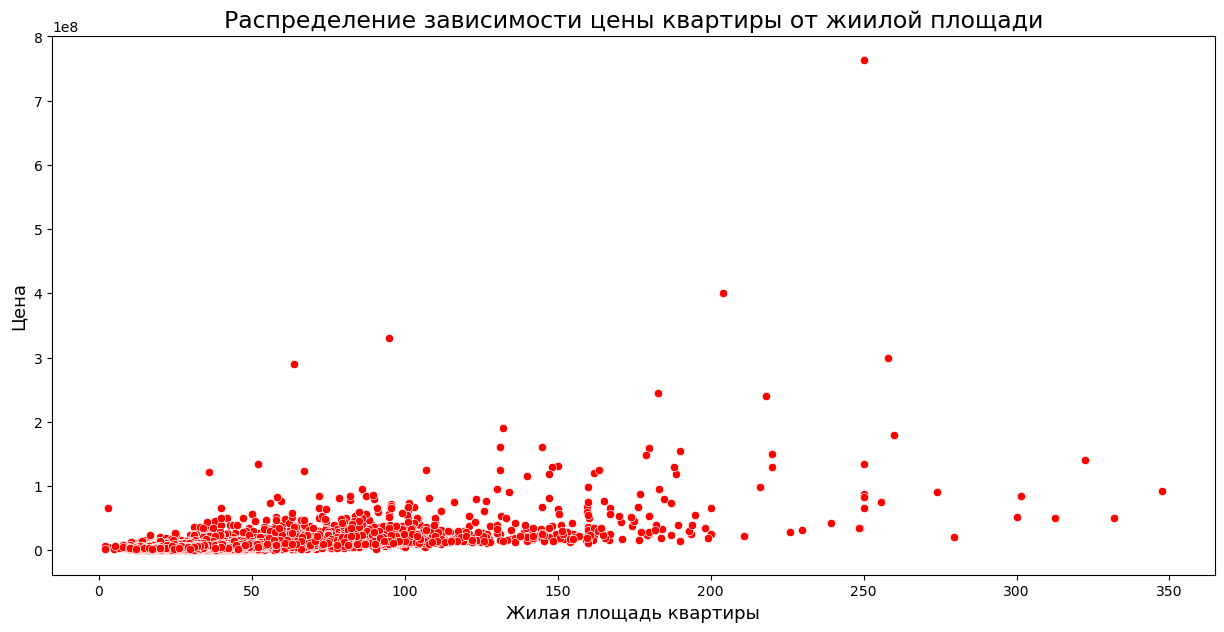

count    21733.000000
mean        34.388490
std         21.590259
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        347.500000
Name: living_area, dtype: float64

In [42]:
plt.figure(figsize=(15, 7))
seaborn.scatterplot(data=df, x='living_area', y='last_price', color='red')

plt.title('Распределение зависимости цены квартиры от жиилой площади', size=17)
plt.xlabel('Жилая площадь квартиры', size=13)
plt.ylabel('Цена', size=13)

plt.show()

df['living_area'].describe()

**Наблюдаем большое скопление точек вокруг точки с координатами [0.5, 100]. Это значит, что большая часть квартир, жилая площадь которых достигает 100 квадратных метров, стоят примерно 5 000 000.**

**3. Площадь кухни**

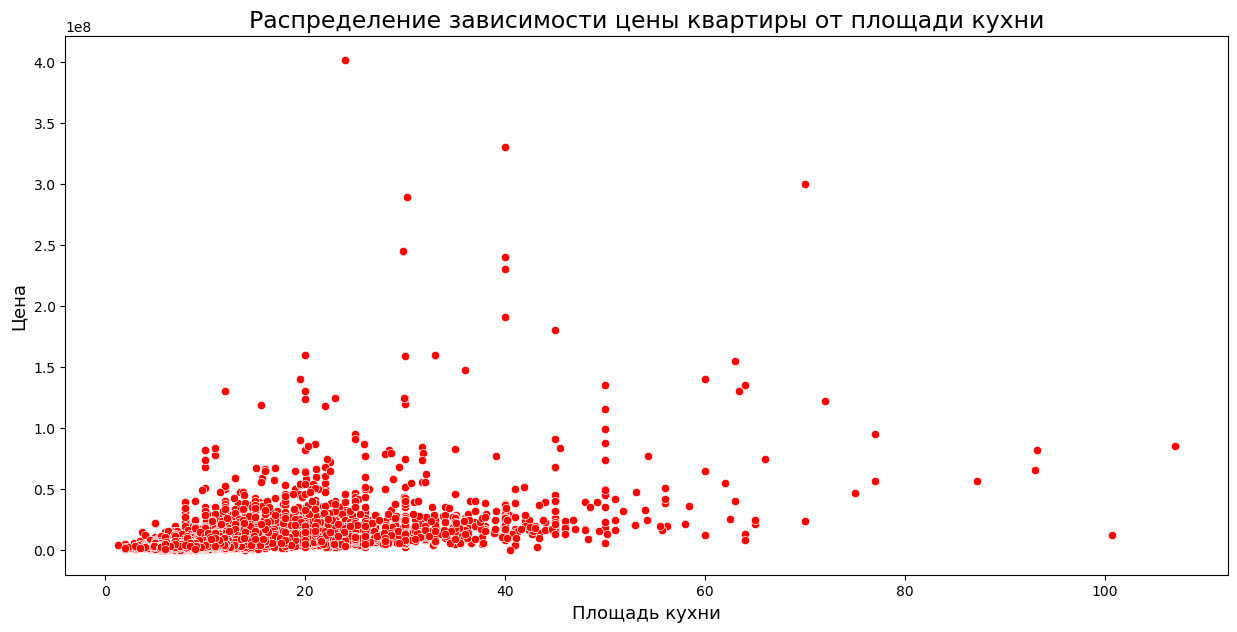

count    21733.000000
mean        34.388490
std         21.590259
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        347.500000
Name: living_area, dtype: float64

In [43]:
#df['kitchen_area'] = df.loc[df['kitchen_area'] > 2]

plt.figure(figsize=(15, 7))
seaborn.scatterplot(data=df, x='kitchen_area', y='last_price', color='red')

plt.title('Распределение зависимости цены квартиры от площади кухни', size=17)
plt.xlabel('Площадь кухни', size=13)
plt.ylabel('Цена', size=13)

plt.show()

df['living_area'].describe()

**Наблюдаем большое скопление точек вокруг точки с координатами [0.5, 20]. Это значит, что большая часть квартир с кухней 20 квадратных метров стоят примерно 5 000 000.**

**4. Количество комнат**

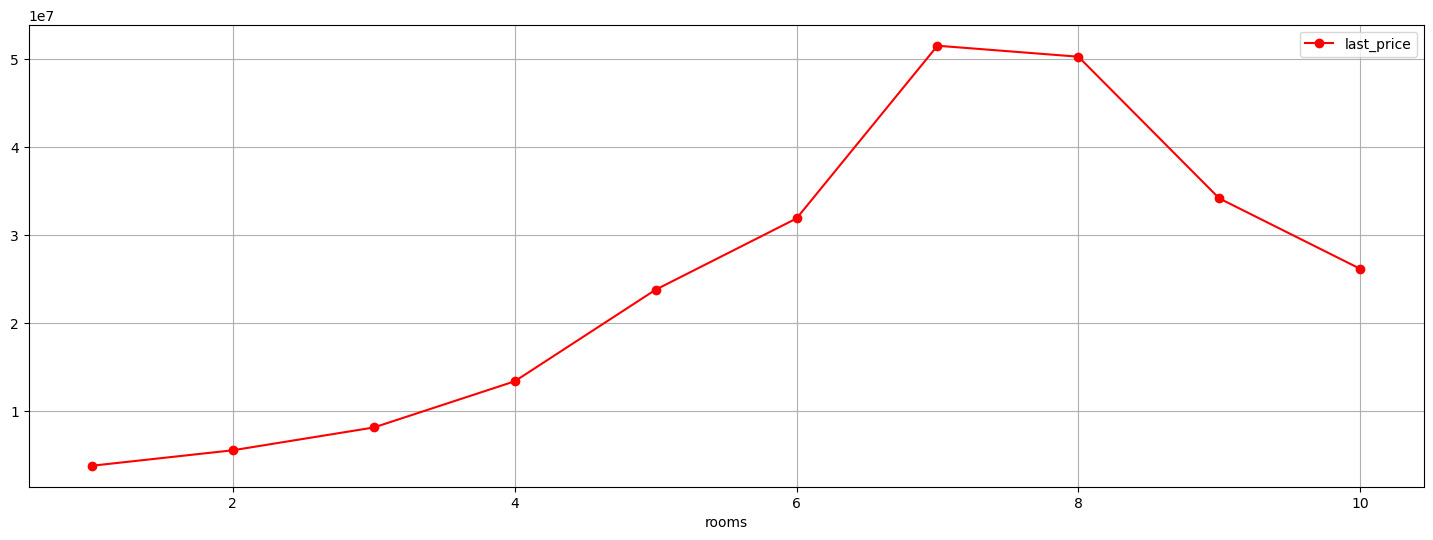

,last_price
count,1.000000e+01
mean,2.486975e+07
std,1.736188e+07
min,3.835139e+06
25%,9.481902e+06
50%,2.498249e+07
75%,3.358428e+07
max,5.147007e+07


In [44]:
df_pivot = df.query('rooms > 0').pivot_table(index=['rooms'], values=['last_price'])

df_pivot.sort_values('rooms', ascending=True).plot(color='red', figsize=(18,6) , style='o-', grid=True)
plt.show()

df_pivot.describe()

**Скачок цены в квартирах, количество комнат в которых равно 12. Медиана - 27 664 750. Среднее - 52 896 510. Стандартное отклонение - 99 314 980.**

**5. Тип этажа**

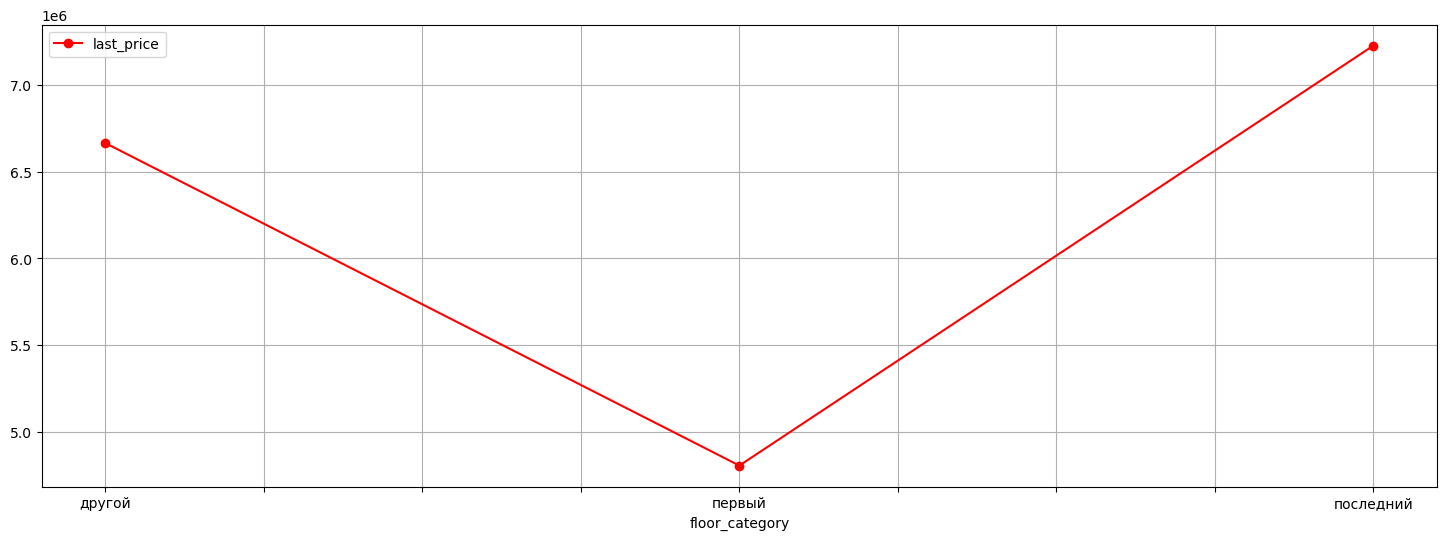

,last_price
count,3.000000e+00
mean,6.233086e+06
std,1.267702e+06
min,4.805699e+06
25%,5.735710e+06
50%,6.665722e+06
75%,6.946779e+06
max,7.227836e+06


In [45]:
df_pivot = df.pivot_table(index=['floor_category'], values=['last_price'])

df_pivot.sort_values('floor_category', ascending=True).plot(color='red', figsize=(18,6) , style='o-', grid=True)
plt.show()

df_pivot.describe()

**Самую низкую цену в этой категории имеют квартиры на первом этаже (4 750 000), самую высокую на последних этажах (7 400 000). Остальные в среднем стоят 6 700 000. Медиана - 6 675 444. Среднее - 6 280 010. Стандартное отклонение - 1 323 795.**

**6. Дата размещения**

**День**

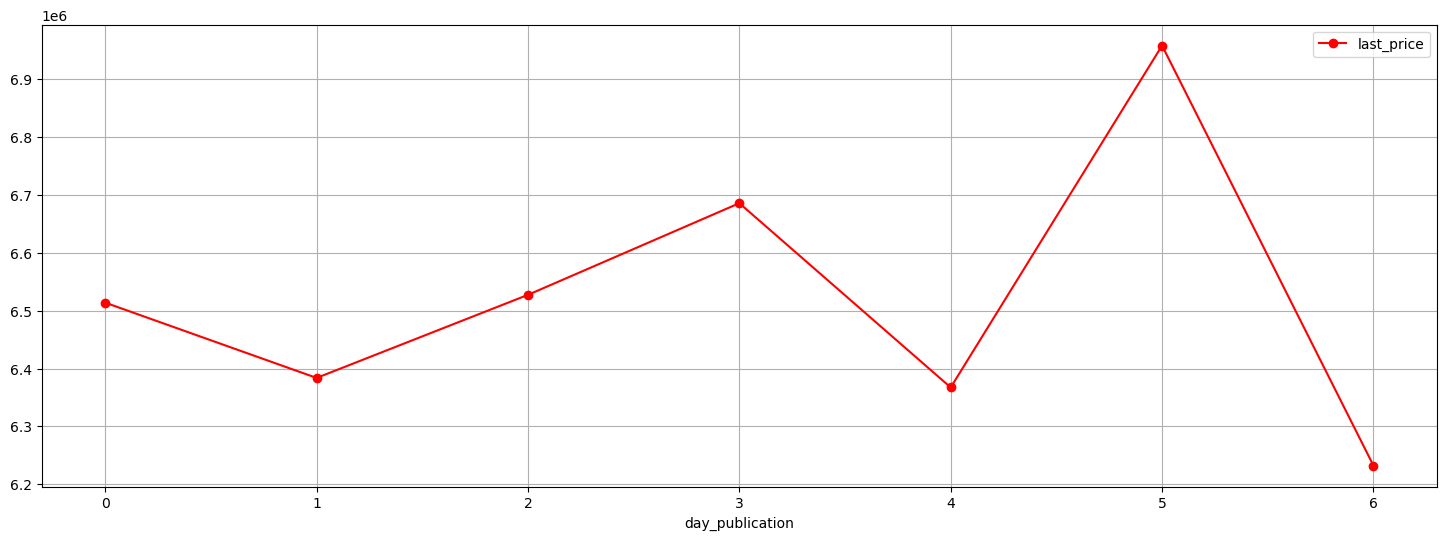

,last_price
count,7.000000e+00
mean,6.523968e+06
std,2.393732e+05
min,6.232304e+06
25%,6.375500e+06
50%,6.513720e+06
75%,6.606442e+06
max,6.957865e+06


In [46]:
df_pivot = df.pivot_table(index=['day_publication'], values=['last_price'])

df_pivot.sort_values('day_publication', ascending=True).plot(color='red', figsize=(18,6) , style='o-', grid=True)
plt.show()

df_pivot.describe()

**Месяц**

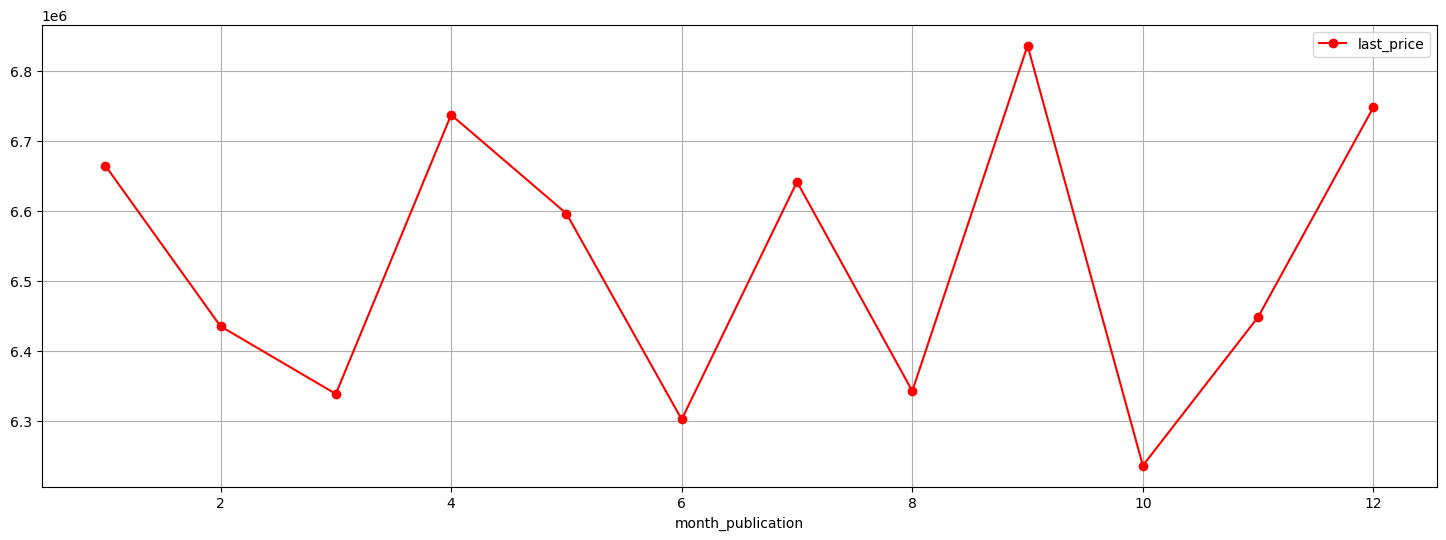

,last_price
count,1.200000e+01
mean,6.527842e+06
std,2.011765e+05
min,6.236619e+06
25%,6.342144e+06
50%,6.522922e+06
75%,6.683557e+06
max,6.836874e+06


In [47]:
df_pivot = df.pivot_table(index=['month_publication'], values=['last_price'])

df_pivot.sort_values('month_publication', ascending=True).plot(color='red', figsize=(18,6) , style='o-', grid=True)
plt.show()

df_pivot.describe()

**Год**

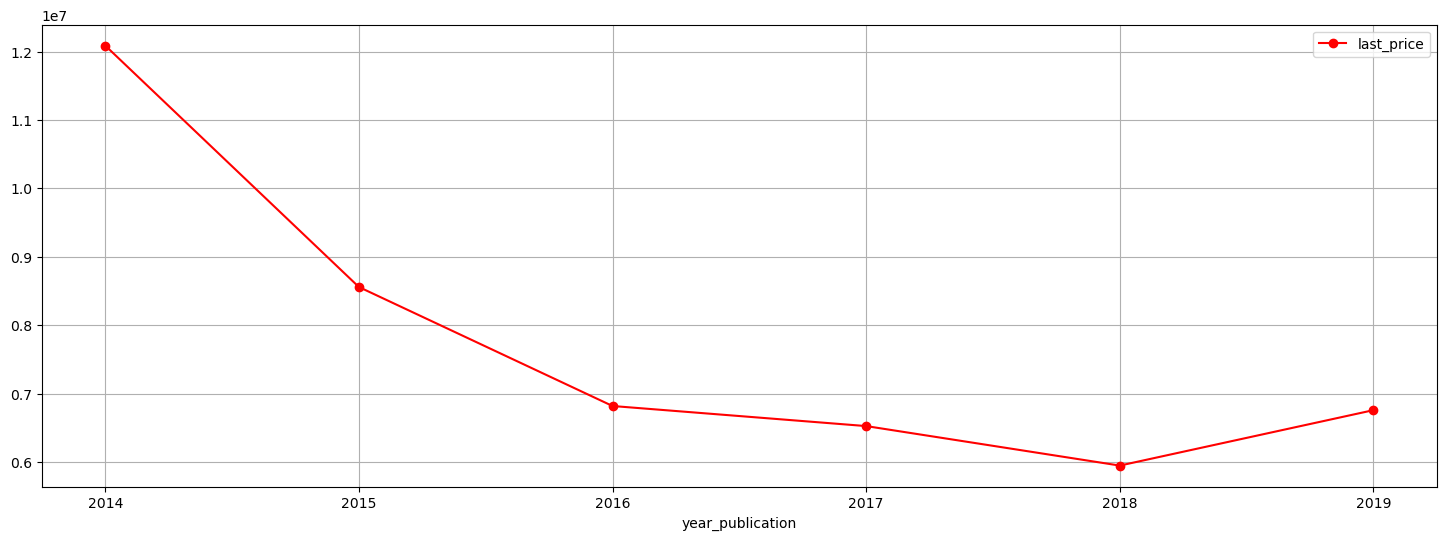

,last_price
count,6.000000e+00
mean,7.783319e+06
std,2.282403e+06
min,5.948968e+06
25%,6.584485e+06
50%,6.789369e+06
75%,8.124003e+06
max,1.208714e+07


In [48]:
df_pivot = df.pivot_table(index=['year_publication'], values=['last_price'])

df_pivot.sort_values('year_publication', ascending=True).plot(color='red', figsize=(18,6) , style='o-', grid=True)
plt.show()

df_pivot.describe()

**Квартиры, выставленные на продажу в `субботу`, в среднем имеют большую стоимость, чем во все остальные дни. И наоборот, меньшую стоимость имеют квартиры, выставленные в `воскресенье`.**

**Тенденция изменения цены по месяцам имеет волнообразный вид, чередование роста-падения цены происходит раз в 1-2 месяца. Наименьшую цену имеют квартиры, выставленные в октябре, наибольшую - в декабре.**

**Присутствует тенденция отрицательного роста цены с 2014 по 2018 год. В 2014 году квартиры стоили 12 000 000, в 2019 - 7 700 000.**

**СРЕДНЯЯ ЦЕНА ОДНОГО КВАДРАТНОГО МЕТРА В 10 НАСЕЛЁННЫХ ПУНКТАХ С НАИБОЛЬШИМ ЧИСЛОМ ОБЪЯВЛЕНИЙ**

In [49]:
df.groupby('locality_name').count().nlargest(10, ['last_price'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,mean_square_price,day_publication,month_publication,year_publication,cityCenters_nearest_km,floor_category
locality_name,,,,,,,,,,,,,,,,,,,,,
Санкт-Петербург,15642,15642,15642,15642,15642,15642,15642,14525,15642,15642,...,7246,15582,7931,13569,15642,15642,15642,15642,15582,15642
поселок Мурино,552,552,552,552,552,552,552,492,552,552,...,0,0,0,547,552,552,552,552,0,552
поселок Шушары,439,439,439,439,439,439,439,403,439,439,...,0,436,152,407,439,439,439,439,436,439
Всеволожск,398,398,398,398,398,398,398,371,398,398,...,0,0,0,339,398,398,398,398,0,398
Пушкин,369,369,369,369,369,369,369,345,369,369,...,212,369,177,307,369,369,369,369,368,369
Колпино,338,338,338,338,338,338,338,328,338,338,...,133,337,190,308,338,338,338,338,337,338
поселок Парголово,327,327,327,327,327,327,327,301,327,327,...,10,327,56,302,327,327,327,327,327,327
Гатчина,307,307,307,307,307,307,307,292,307,307,...,0,0,0,268,307,307,307,307,0,307
деревня Кудрово,299,299,299,299,299,299,299,262,299,299,...,0,0,0,299,299,299,299,299,0,299


In [50]:
spb = pivot_table = (df.groupby('locality_name', as_index=False).agg({'total_area' : 'count', 'mean_square_price' : 'mean'}) 
                                              .rename({'total_area' : 'count'}, axis=1)
                                              .sort_values(by='count', ascending=False) 
                                              .head(10) 
                                              .sort_values(by='mean_square_price', ascending=False)) 
display(spb)

,locality_name,count,mean_square_price
34,Санкт-Петербург,15642,114850.654065
33,Пушкин,369,103125.819291
93,деревня Кудрово,299,92473.547576
224,поселок Парголово,327,90175.913458
217,поселок Мурино,552,85629.568678
277,поселок Шушары,439,78551.344545
14,Колпино,338,75424.579098
7,Гатчина,307,68746.146763
4,Всеволожск,398,68654.473986
5,Выборг,237,58141.909153


**СРЕДНЯЯ ЦЕНА КАЖДОГО КИЛОМЕТРА**

In [51]:
spb = spb.copy()
spb = df.loc[df['locality_name'] == 'Санкт-Петербург']

spb.loc[:, 'mean_price_for_km'] = spb.loc[:, 'mean_square_price'].mean() / spb.loc[:, 'cityCenters_nearest']

C:\Users\JesusChristosovitch\AppData\Local\Temp\ipykernel_6508\2396548007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb.loc[:, 'mean_price_for_km'] = spb.loc[:, 'mean_square_price'].mean() / spb.loc[:, 'cityCenters_nearest']


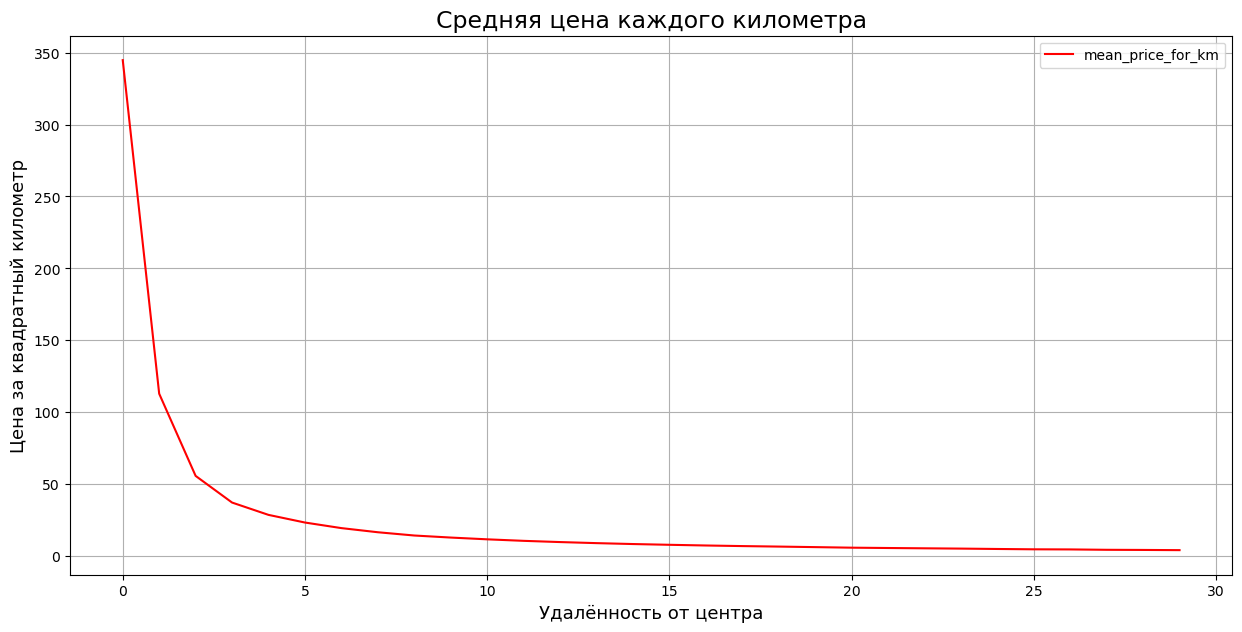

In [52]:
spb.pivot_table(index='cityCenters_nearest_km', values='mean_price_for_km')\
    .plot(color='red', grid=True, title='Средняя цена каждого километра', figsize=(15, 7))

plt.title('Cредняя цена каждого километра', size=17)
plt.xlabel('Удалённость от центра', size=13)
plt.ylabel('Цена за квадратный километр', size=13)

plt.show()

**Видим прямую корреляцию стоимости объектов относительно расстояния до центра города - чем ближе центр, тем цена выше.**

## Общий вывод  <a class="anchor" id="4"></a>
### Итоги проделанной работы.

В ходе исследования я изучил данные, определил пропущенные значения, заполнил пропущенные значения там, где это возможно, пояснил, какие пропущенные значения я обнаружил, изменил типы данных и аргументировал эти действия, устранил неявные дубликаты в названиях населённых пунктов, аномалии.

**Среднестатистическая квартира следующим образом:**

- `общая площадь` квартиры в среднем `от 30 до 60 квадратных метров`; 
- `жилая площадь` - `20-30 квадратных метров`; 
- `площадь кухни` редко превышает `20 квадртных метров`; 
- `цена` на квартиры колеблется в диапазоне `3 000 000 - 6 000 000`; 
- `высота потолков` составляет `2.5 метра`; 
- чаще всего `квартиры` находятся `на 2-5 этаже`; 
- в среднем `квартиры` находятся `в 15 км от центра`, `в 25 км от аэропорта` и `в 0.5 км от парка`.

Благодаря полученным данным я смог узнать, как быстро продавались квартиры - 70% квартир было продано примерно за полгода с момента публикации объявления.

Я выяснил, какие факторы влияют на полную стоимость объекта, например такие как общая площадь, жилая площадь, площадь кухни, количество комнат, тип этажа, на котором расположена квартира (первый, последний, другой), дата размещения.

Была подсчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
```
Цена квадратного метра в городе с самой высокой стоимостью квадратного метра, Санкт-Петербурге, составила `215046.5.
Цена квадратного метра в городе с самой низкой стоимостью квадратного метра, Выборге, составила 98981.6.
```
Была вычислена средняя цена километра до центра города. График имеет вид гиперболы, что говорит нам об обратной зависимости цены от расстояния - чем меньше расстояние от центра, тем больше стоимость объектов.